<a href="https://colab.research.google.com/github/harrshat/MachineLearningReferenceDocs/blob/main/Project%20Implementation%20Life%20Cycle%20Simple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/height-weight (1).csv')
df.head(3)

,Weight,Height
0,45,120
1,58,135
2,48,123


In [ ]:
df.shape

(23, 2)

In [ ]:
# Aim: To be able to predict the height when weight is input

In [ ]:
df.isnull().sum()

,0
Weight,0
Height,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [ ]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


<Axes: >

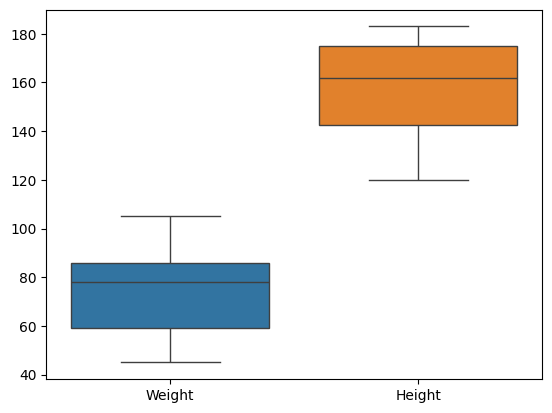

In [ ]:
# Check for outliers
sns.boxplot(df)
# No outliers

Text(0, 0.5, 'Height')

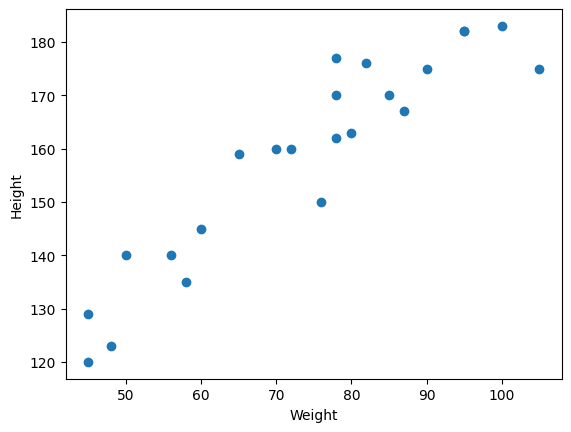

In [ ]:
# What does data look like
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
# Independent and dependent features
X=df[['Weight']] #Independent
y=df['Height'] #Dependent

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [ ]:
X_train.shape # 17,1
X_test.shape # 6,1

(6, 1)

In [ ]:
# Standardize data (input only) - Since weight and height are in different units
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) # fit-> calculate mean and std dev, transform-> apply z score on all the data points
X_test_scaled= scaler.transform(X_test) #only transform here to apply z score but avoid data leakage

In [ ]:
X_train_scaled

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [ ]:
X_test_scaled

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test_scaled)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [ ]:
print("Coefficient of weight or Slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

print("\nInference: \nWith one unit increase in 'weight', there is a 17.298 increase in 'height'")

Coefficient of weight or Slope:  [17.2982057]
Intercept:  156.47058823529412

Inference: 
With one unit increase in 'weight', there is a 17.298 increase in 'height'


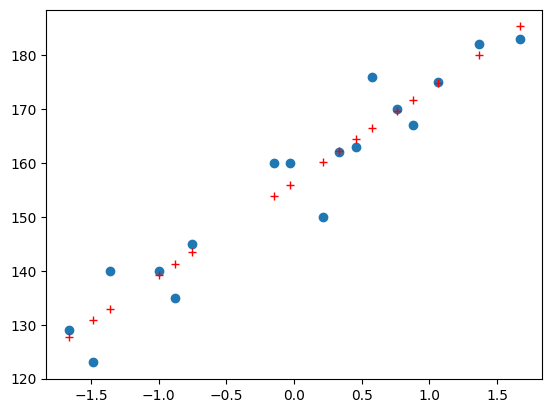

In [ ]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,regression.predict(X_train_scaled),'r+')

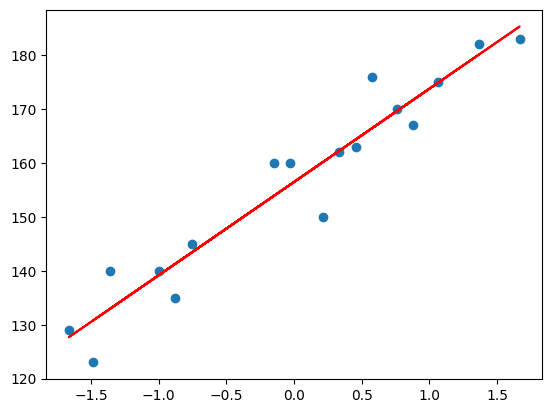

In [ ]:
plt.scatter(X_train_scaled,y_train)

#best fit line
plt.plot(X_train_scaled,regression.predict(X_train_scaled),'r-')

In [ ]:
# Performance metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
score=r2_score(y_test,y_pred)
print("Accuracy: R2 Score: ",score*100,"%")
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error: ",mae)
mse= mean_squared_error(y_test,y_pred)
print("Mean Square error: ",mse)
root_mse=np.sqrt(mse)
print("Root mean Square Error:",root_mse)

Accuracy: R2 Score:  73.60826717981276 %
Mean Absolute error:  9.66512588679501
Mean Square error:  114.84069295228699
Root mean Square Error: 10.716374991212605


## Adjusted R squared
Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
where:

- R2: The R2 of the model
- n: The number of observations -test set
- k: The number of predictor/independent variables- test set

In [ ]:
adjusted_r2_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score: ",adjusted_r2_score)
print("Accuracy from adjusted r squared: ",adjusted_r2_score*100,"%")

Adjusted R2 Score:  0.6701033397476595
Accuracy from adjusted r squared:  67.01033397476594 %


In [ ]:
score

0.7360826717981276

In [ ]:
len(y_test)

6

In [ ]:
X_test.shape[1]

1

In [ ]:
## Let's say new weight you want to predict height for is 80
weight_to_predict=[[80]]
scaled_weight_to_predict=scaler.transform(weight_to_predict)
scaled_weight_to_predict

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.45613165]])

In [ ]:
regression.predict(scaled_weight_to_predict)
#Predicted height: 164.36

array([164.36084726])

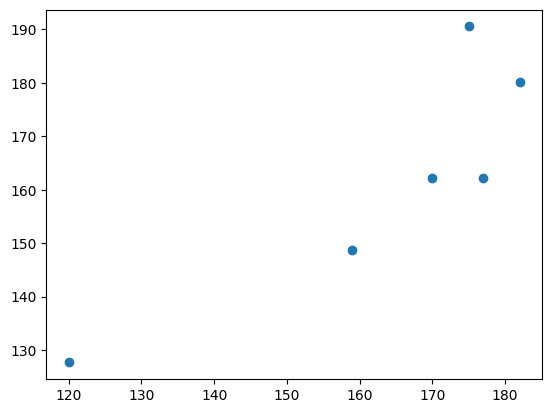

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
# Residuals - y_test-y_pred
residuals = y_test-y_pred
residuals

,Height
15,14.735003
9,7.735003
0,-7.683471
8,1.920277
17,10.358028
12,-15.558973


/tmp/ipython-input-3762910054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

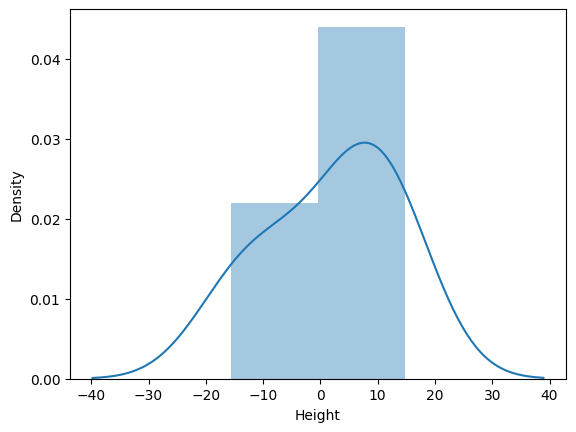

In [ ]:
sns.distplot(residuals,kde=True)

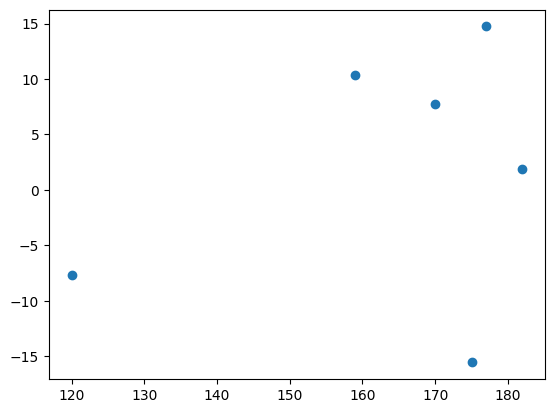

In [ ]:
plt.scatter(y_test,residuals)
# Uniform distribution (no pattern) -- good